# Example how to analyze the manifold of any Dataset of Spiking Data in Tonic format (t,x,p) (time,neuron,polarity)

In [1]:
from pathlib import Path
import manifolduntanglinganalysis.preprocessing.datatransforms as datatransforms
import manifolduntanglinganalysis.preprocessing.dataloader as dataloader

# Für Jupyter Notebooks: Finde project_root vom aktuellen Arbeitsverzeichnis aus
current_dir = Path.cwd()
# Navigiere zum project_root (2 Ebenen hoch vom examples-Ordner)
if 'examples' in str(current_dir):
    project_root = current_dir.parent.parent
else:
    # Falls wir schon im project_root sind oder woanders
    project_root = current_dir
    # Versuche, das Projekt-Root zu finden (suche nach typischen Markern)
    for parent in current_dir.parents:
        if (parent / 'manifolduntanglinganalysis').exists() or (parent / 'examples').exists():
            project_root = parent
            break

project_root = Path(project_root).resolve()
data_path = str(project_root / "data" / "input")
print(f"📁 Project Root: {project_root}")
print(f"📁 Data Path: {data_path}")

transform = datatransforms.get_preprocessing(
    n_time_bins=80,
    target_neurons=350,
    original_neurons=700,
    fixed_duration=958007.0
)


# Data loading
test_dataloader = dataloader.load_filtered_shd_dataloader(
    label_range=range(0, 10),
    data_path=data_path,
    transform=transform, 
    train=False, 
    batch_size=64,
    num_samples=512
)

📁 Project Root: /home/karl-/git/SNN-Training-Evolution-Manifold-Untangling-Analysis
📁 Data Path: /home/karl-/git/SNN-Training-Evolution-Manifold-Untangling-Analysis/data/input
📊 Begrenzt auf 512 Samples (von 1079 gefilterten)


## Intrinsic Dimension Estimation of the (Data-)Manifold Later needed for Persistent Homology


✅ Intrinsische Dimension: 26 Dimensionen erklären 80% der Varianz
✅ Plot gespeichert: /home/karl-/git/SNN-Training-Evolution-Manifold-Untangling-Analysis/examples/spiking_Heidelberg_Digits_on_Feed_Forward_Spiking_Neural_Network_complete_pipeline/plots/explained_variance_intrinsic_dimension_pca.png
✅ MLE geschätzte Dimension: 21.04
⚠️ Zu viele Samples (40960), subsample auf 30000 für Two-NN
   (Two-NN ist O(n²) - würde sonst sehr lange dauern)
✅ Two-NN geschätzte Dimension: 30.67


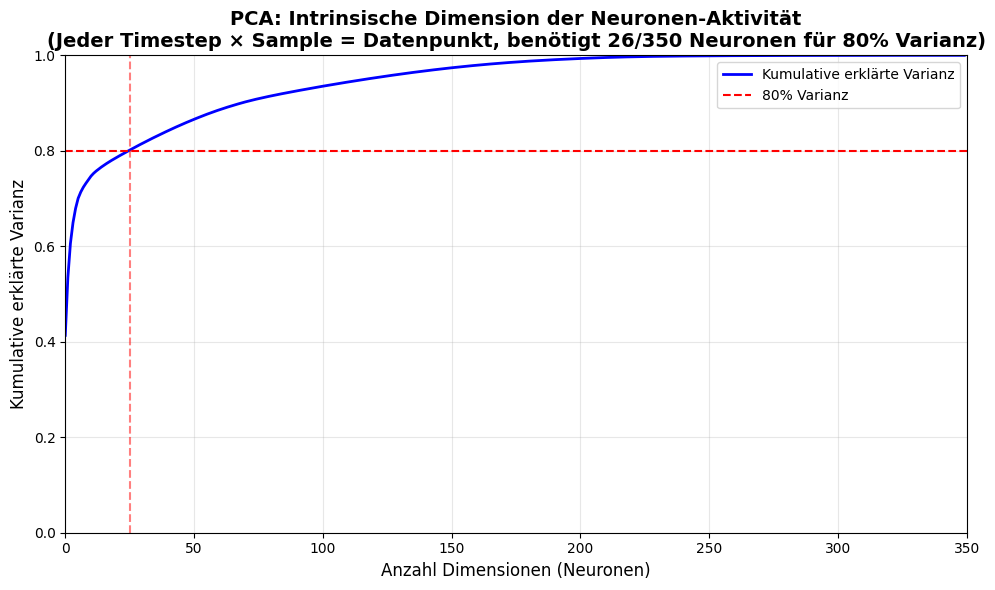

In [2]:
import manifolduntanglinganalysis.analysis.intrinsic_dimension as id_analysis
pca_intdim,fig=id_analysis.explained_variance_dimension(test_dataloader,perc=0.80)
mle_dim = id_analysis.mle_intrinsic_dimension(test_dataloader)
twonn_dim = id_analysis.twonn_intrinsic_dimension(test_dataloader)
fig

## Manifold Visualization

In [ ]:
import manifolduntanglinganalysis.analysis.dimension_reduction_visualisation as dim_vis

dim_reduction_visualizer = dim_vis.DimensionReductionVisualizer(test_dataloader)

dim_reduction_visualizer.add_pca(name="PCA 2D",n_components=2)
dim_reduction_visualizer.add_pca(name="PCA 3D",n_components=3)
dim_reduction_visualizer.add_tsne(name="t-SNE (perplexity=5)",n_components=2,perplexity=5)
dim_reduction_visualizer.add_tsne(name="t-SNE (perplexity=15)",n_components=2,perplexity=15)
dim_reduction_visualizer.add_tsne(name="t-SNE (perplexity=50)",n_components=2,perplexity=50)
dim_reduction_visualizer.add_tsne(name="t-SNE (perplexity=15)",n_components=3,perplexity=15)
dim_reduction_visualizer.add_tsne(name="t-SNE (perplexity=50)",n_components=3,perplexity=50)
dim_reduction_visualizer.add_umap(name="UMAP (n_neighbors=10,min_dist=0.5)",n_components=2,n_neighbors=10,min_dist=0.5)
dim_reduction_visualizer.add_umap(name="UMAP (n_neighbors=30,min_dist=0.5)",n_components=2,n_neighbors=30,min_dist=0.5)
dim_reduction_visualizer.add_umap(name="UMAP (n_neighbors=50,min_dist=0.5)",n_components=2,n_neighbors=50,min_dist=0.5)
dim_reduction_visualizer.add_umap(name="UMAP (n_neighbors=100,min_dist=0.5)",n_components=2,n_neighbors=100,min_dist=0.5)
dim_reduction_visualizer.add_umap(name="UMAP (n_neighbors=100,min_dist=0.5)",n_components=3,n_neighbors=10,min_dist=0.5)
dim_reduction_visualizer.add_umap(name="UMAP (n_neighbors=100,min_dist=0.5)",n_components=3,n_neighbors=30,min_dist=0.5)
dim_reduction_visualizer.add_umap(name="UMAP (n_neighbors=100,min_dist=0.5)",n_components=3,n_neighbors=50,min_dist=0.5)
dim_reduction_visualizer.add_umap(name="UMAP (n_neighbors=100,min_dist=0.5)",n_components=3,n_neighbors=100,min_dist=0.5)
#dim_reduction_visualizer.add_isomap(n_components=2,n_neighbors=5) not enough RAM
fig = dim_reduction_visualizer.build_plot(save_path="../../plots/dimension_reduction_comparison.png")
fig
